In [21]:
from utils import *
import numpy as np
import torch

train_size = 1000
train_start = 0
train_size_batch = 200
dev_size = 200
test_size = 300
np.random.seed(0)
torch.manual_seed(0)

X_train, y_train_clean, X_dev, y_dev, X_test, y_test = load_data(train_size, dev_size, test_size)
y_train, flip_indices = flip_labels(y_train_clean, flip_fraction=0.3)

Test the models on clean dataset

In [22]:
cnn_accuracy_pure, cnn_accuracies_pure = cnn_tests(X_train, y_train_clean, X_dev, y_dev)
print('CNN accuracy on clean dataset: {}'.format(cnn_accuracy_pure))

logistic_accuracy_pure = logistic_test(X_train, y_train_clean, X_dev, y_dev)
print('Logistic Regression accuracy on clean dataset: {}'.format(logistic_accuracy_pure))

Accuracy of CNN model on cuda: 0.89
Accuracy of CNN model on cuda: 0.88
Accuracy of CNN model on cuda: 0.89
Accuracy of CNN model on cuda: 0.91
Accuracy of CNN model on cuda: 0.90
Accuracy of CNN model on cuda: 0.91
Accuracy of CNN model on cuda: 0.88
Accuracy of CNN model on cuda: 0.90
CNN accuracy on clean dataset: 0.8931250000000001
Accuracy of Logistic Regression model: 0.80
Logistic Regression accuracy on clean dataset: 0.795


Merge the all indices file to the total indices file

In [23]:
min_indices = np.array([])
for train_start in range(0, train_size, train_size_batch):
    file_path = f'./data/min_indices_{str(train_start).zfill(3)}-{str(train_start+train_size_batch-1).zfill(3)}_{dev_size}.npy'
    if os.path.isfile(file_path):
        old_data = np.load(file_path)
        min_indices = np.concatenate((min_indices, old_data))
min_indices = min_indices.astype(int)
np.save(f'./data/min_indices_{train_size_batch}_{dev_size}.npy', min_indices)

Calculate the confusion matrix

[[  0.   0.]
 [300. 700.]]


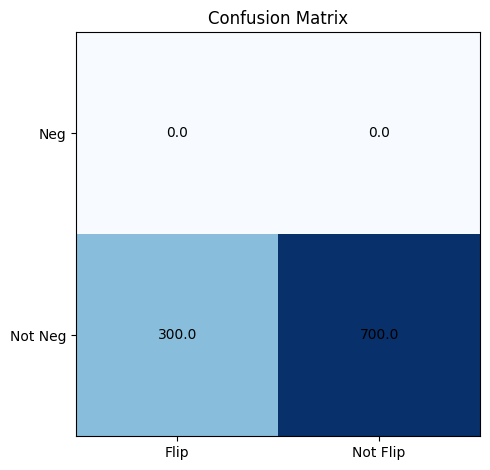

Accuracy: 0.7
Precision: nan
Recall: 0.0
F1 Score: nan
Specificity: 1.0


C:\windsnow1024\GitHub\Shapley\utils.py:304: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


In [24]:
confusion_matrix = create_confusion_matrix(min_indices, flip_indices, train_size)
print(confusion_matrix)
plot_confusion_matrix(confusion_matrix)

accuracy, precision, recall, f1_score, specificity = calculate_metrics(confusion_matrix)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"Specificity: {specificity}")

Train models on the dataset with different delete ratios

In [25]:
min_indices = np.load(f'./data/min_indices_{train_size_batch}.npy')

delete_ratios = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

cnn_accuracy = np.zeros(len(delete_ratios))
logistic_accuracy = np.zeros(len(delete_ratios))
cnn_accuracies = [None] * len(delete_ratios)

for i, delete_ratio in enumerate(delete_ratios):
    print('Delete ratio: {}'.format(delete_ratio))

    X_train_cleaned, y_train_cleaned = delete_data(X_train, y_train, min_indices, delete_ratio)

    cnn_accuracy[i], cnn_accuracies[i] = cnn_tests(X_train_cleaned, y_train_cleaned, X_test, y_test, runs=64)
    logistic_accuracy[i] = logistic_test(X_train_cleaned, y_train_cleaned, X_test, y_test)

print('CNN accuracies: {}'.format(cnn_accuracy))
print('Logistic Regression accuracies: {}'.format(logistic_accuracy))

FileNotFoundError: [Errno 2] No such file or directory: './data/min_indices_200.npy'

Plot the accuracy vs delete ratio

In [ ]:
visualize_accuracy(delete_ratios, cnn_accuracies, logistic_accuracy, cnn_accuracies_pure, logistic_accuracy_pure)